import all necessary libraries to proceed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

to load the dataset for analysis

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

To check the first five in dataset to using .head() function

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


To check the last five in dataset to using .tail() function

In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


To check the dataset inf and check the type of a column information use .info() and check the type of a column 

In [5]:
df.info(),df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(None,
 gender                  object
 age                    float64
 hypertension             int64
 heart_disease            int64
 smoking_history         object
 bmi                    float64
 HbA1c_level            float64
 blood_glucose_level      int64
 diabetes                 int64
 dtype: object)

To check the shape and size of the dataset

In [6]:
df.shape,df.size

((100000, 9), 900000)

Check the duplicate value and the sum of duplicate

In [7]:
df.duplicated().sum()

3854

Remove the duplicate value using drop_duplicate

In [8]:
df = df.drop_duplicates()

To chek the dataset count,mean,std,min,quantile and max using .describe()

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


check the smoking history & gender unique value using .unique

In [10]:
df['smoking_history'].unique(),df['gender'].unique()

(array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
       dtype=object),
 array(['Female', 'Male', 'Other'], dtype=object))

replace the smoking hiatory value not current to former

In [11]:
df['smoking_history'] = df['smoking_history'].replace('not current','former')

To plot the barplot for gender,age and smoking history

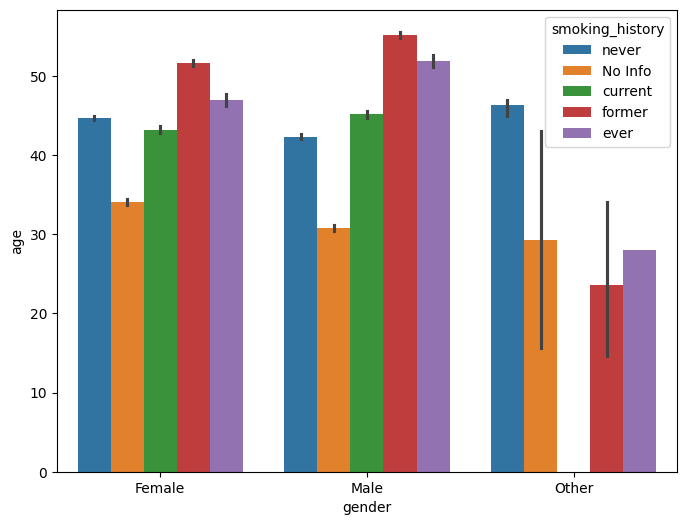

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(df,x='gender',y='age',hue='smoking_history')
plt.show()

create a pivot table for gender and diabetes

In [13]:
pie =pd.pivot_table(df,index = 'gender',values = ['diabetes'],aggfunc='mean')

In [14]:
pie

,diabetes
gender,
Female,0.079183
Male,0.100958
Other,0.000000


plot a pie chart for gender and diabetes to know the diabetes percentage of the gender

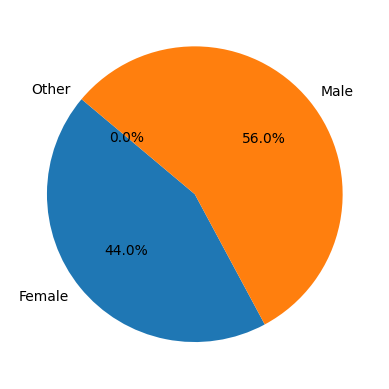

In [15]:
plt.pie(pie.diabetes,labels=pie.index,autopct='%1.1f%%', startangle=140)
plt.show()

Do strippolt for diabetes,bmi hue of heart disease

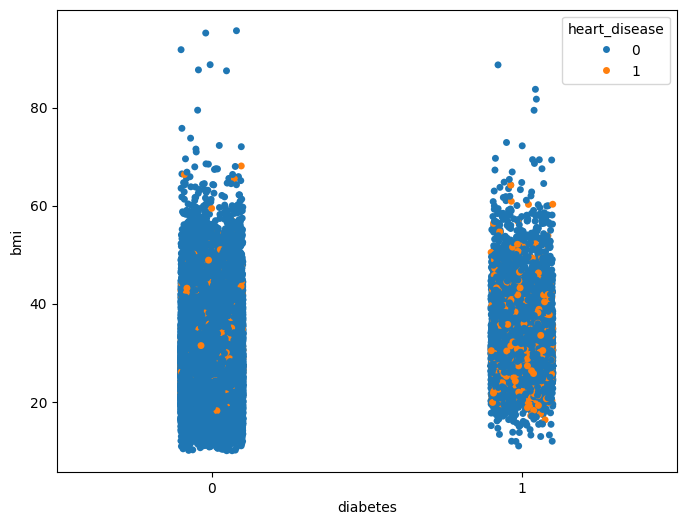

In [16]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df.diabetes,y=df.bmi,hue = df.heart_disease)
plt.show()

Do strippolt for diabetes,blood glucose hue of smoking history

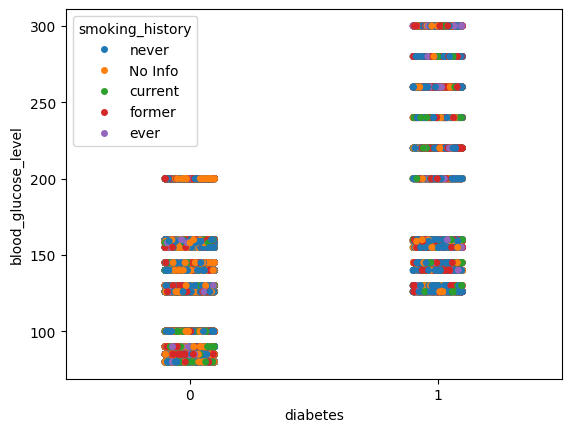

In [17]:
sns.stripplot(x=df.diabetes,y=df.blood_glucose_level,hue=df.smoking_history)
plt.show()

Do strippolt for diabetes,Hba1c  hue of hypertension

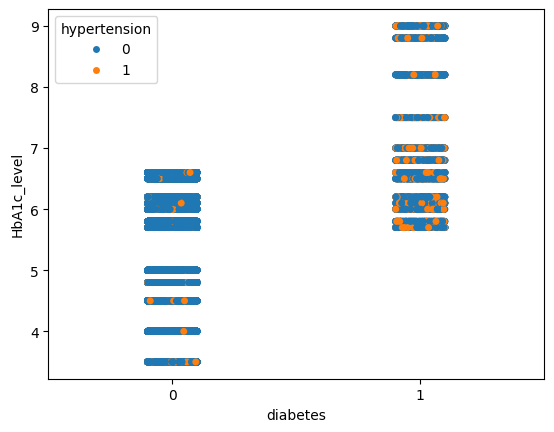

In [18]:
sns.stripplot(x=df.diabetes,y=df.HbA1c_level,hue = df.hypertension)
plt.show()

plot the scatter plot to check the Hba1c level depends on bmi

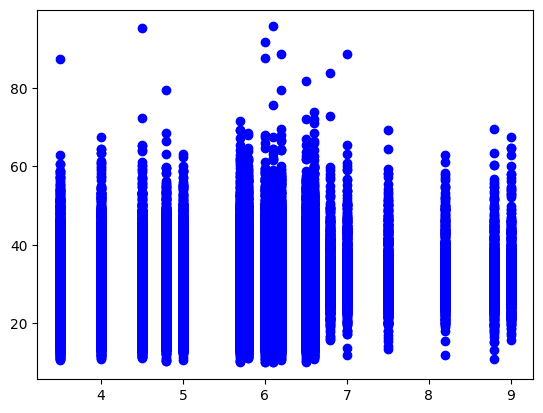

In [19]:
plt.scatter(df.HbA1c_level,df.bmi,color='b')
plt.show()

Check the Hba1c unique values

In [20]:
df['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

check the gender of others count

In [21]:
df[df['gender'] == 'Other'].count()

gender                 18
age                    18
hypertension           18
heart_disease          18
smoking_history        18
bmi                    18
HbA1c_level            18
blood_glucose_level    18
diabetes               18
dtype: int64

TO check null values to using isnull and count the null value to use sum,so that we getting the null values count

In [22]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

to check the not null values

In [23]:
df.notnull().sum()

gender                 96146
age                    96146
hypertension           96146
heart_disease          96146
smoking_history        96146
bmi                    96146
HbA1c_level            96146
blood_glucose_level    96146
diabetes               96146
dtype: int64

drop the other gender

In [24]:
df = df.drop(df.loc[df['gender']=='Other'].index)

Check the gender unique

In [25]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

check the smoking history unique

In [26]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever'], dtype=object)

we encoding a data to proceed the linear regression model. To use label encoder to change the catagorical data to numerical data. to import the library for label encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

to transform the label encoder to cfit_transform

In [29]:
df['gender'] =label_encoder.fit_transform(df['gender'])
df['smoking_history'] =label_encoder.fit_transform(df['smoking_history'])

To check the correlation of the data

In [30]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028670,0.014196,0.078512,-0.082102,-0.023490,0.019928,0.017831,0.037837
age,-0.028670,1.000000,0.257297,0.238449,0.239762,0.344779,0.106708,0.114323,0.264918
hypertension,0.014196,0.257297,1.000000,0.119972,0.094921,0.148124,0.081443,0.084841,0.195696
heart_disease,0.078512,0.238449,0.119972,1.000000,0.023483,0.061382,0.068142,0.070838,0.170701
smoking_history,-0.082102,0.239762,0.094921,0.023483,1.000000,0.187931,0.035545,0.038996,0.089882
bmi,-0.023490,0.344779,0.148124,0.061382,0.187931,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.019928,0.106708,0.081443,0.068142,0.035545,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,0.038996,0.092593,0.171717,1.000000,0.424366
diabetes,0.037837,0.264918,0.195696,0.170701,0.089882,0.214951,0.406446,0.424366,1.000000


To assign the value x and drop the charges column & sign a target value to y

In [31]:
x=df.drop(['diabetes'],axis=1)
y=df['diabetes']

split x and y value for train and test to use library train_test_split

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 50)

To check the shape of x_train,x_test,y_train and y_test

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72096, 8), (24032, 8), (72096,), (24032,))

In [ ]:
Check the sigmoid value

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [35]:
sigmoid(0),sigmoid(10),sigmoid(100),sigmoid(10000000)

(0.5, 0.9999546021312976, 1.0, 1.0)

In [36]:
sigmoid(50000000),sigmoid(-10),sigmoid(-100),sigmoid(-500000000)

C:\Users\Megala\AppData\Local\Temp\ipykernel_26456\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


(1.0, 4.5397868702434395e-05, 3.7200759760208356e-44, 0.0)

To implement the Logistic regression model using library

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_lc = LogisticRegression(max_iter=500)

To train Logistic regression model

In [40]:
model_lc.fit(x_train,y_train)

LogisticRegression(max_iter=500)

To check the  model_lr.intercept_

In [41]:
model_lc.intercept_

array([-27.26572689])

To check the coef value of the model

In [42]:
model_lc.coef_

array([[0.25161833, 0.04586398, 0.6766748 , 0.74876031, 0.0942073 ,
        0.0868272 , 2.31302397, 0.03336815]])

To predict the y value

In [43]:
y_pre = model_lc.predict(x_test)

In [44]:
y_pre

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

To find the accuracy of the model using a library

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test, y_pre)

In [47]:
accuracy*100

95.93874833555259

Train a model for sgdc clasifier

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
model_sgdc = SGDClassifier()

In [50]:
model_sgdc.fit(x_train,y_train)

SGDClassifier()

To check the  model_lr.coef

In [51]:
model_sgdc.intercept_

array([-1378.3324622])

To check the  model_lr.intercept_

In [52]:
model_sgdc.coef_

array([[ 12.54854239,   2.78069486,  11.33473997,  10.32730615,
          6.5449913 ,   5.55800572, 115.75747429,   1.54110746]])

To predict the y value

In [53]:
y_prd = model_sgdc.predict(x_test)

In [54]:
y_prd

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

To find the accuracy of the model using a library

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy = accuracy_score(y_test, y_prd)

In [57]:
accuracy*100

95.50599201065246

to check confusion matriix for diabetes and no diabetes for logistic model

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion = confusion_matrix(y_test,y_pre)

In [60]:
confusion

array([[21740,   204],
       [  772,  1316]], dtype=int64)

to check confusion matriix for diabetes and no diabetes for sgdc model

In [61]:
sgdc_confusion = confusion_matrix(y_test,y_prd)

In [62]:
sgdc_confusion

array([[21514,   430],
       [  650,  1438]], dtype=int64)

to check the precision,recall and f1 score for logistic model using library

In [63]:
from sklearn.metrics import classification_report
target_names = ['no_diabets','diabets']

In [64]:
classi = classification_report(y_test,y_pre,target_names=target_names)

In [65]:
print(classi)

              precision    recall  f1-score   support

  no_diabets       0.97      0.99      0.98     21944
     diabets       0.87      0.63      0.73      2088

    accuracy                           0.96     24032
   macro avg       0.92      0.81      0.85     24032
weighted avg       0.96      0.96      0.96     24032



to check the precision,recall and f1 score for sgdc model using library

In [66]:
sgdc_classi = classification_report(y_test,y_prd,target_names=target_names)

In [67]:
print(sgdc_classi)

              precision    recall  f1-score   support

  no_diabets       0.97      0.98      0.98     21944
     diabets       0.77      0.69      0.73      2088

    accuracy                           0.96     24032
   macro avg       0.87      0.83      0.85     24032
weighted avg       0.95      0.96      0.95     24032



In [ ]:
# THE PRISSION FOR THIS MODEL 95% WHICH MEAN 5% OF THE PEOPLE PREDICTED TO HAVE DIABETES DO NOT HAVE IT
# RECALL FOR THIS MODEL 96% WHICH MEAN 4% OF THE PEOPLE PREDICTED DO NOT HAVE DIABETES BUT MODEL SAYS THEY HAVE

to check the recursive feature elimination use to select features by recursively considering smaller and smaller sets of features.

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(model_lc,n_features_to_select=None,step=1,verbose=0,importance_getter = 'auto')

In [69]:
rfe =rfe.fit(x,y)

In [70]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False False  True False]
[1 4 1 1 2 3 1 5]


In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(model_sgdc,n_features_to_select=None,step=1,verbose=0,importance_getter = 'auto')
rfe =rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False False  True False]
[1 4 1 1 2 3 1 5]


To import the library feature selection for RFE with cross validation.K-fold cross-validation is a popular technique used in machine learning to evaluate the performance of a model.

In [71]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
min_features_to_select=1
scv=StratifiedKFold()
rfecv =RFECV(
       estimator=model_lc,   
       step=1,cv=scv,
       scoring='accuracy',
       min_features_to_select=min_features_to_select,
       n_jobs=2)                          
rfecv.fit(x,y)
print(f"optimal number of features:{rfecv.n_features_}")



optimal number of features:8


In [76]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
min_features_to_select=1
scv=StratifiedKFold()
rfecv =RFECV(
       estimator=model_sgdc,   
       step=1,cv=scv,
       scoring='accuracy',
       min_features_to_select=min_features_to_select,
       n_jobs=2)                          
rfecv.fit(x,y)
print(f"optimal number of features:{rfecv.n_features_}")

optimal number of features:8


In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
return_x_y= True
print('Dataset shape before SelectKBest method:',x.shape)


Dataset shape before SelectKBest method: (96128, 8)


In [73]:
x_new =SelectKBest(chi2,k=2).fit_transform(x_train,y_train)
print('Dataset shape after SelectKBest method:',x_new.shape)

Dataset shape after SelectKBest method: (72096, 2)


Variance Thresholding is a simple yet effective technique for feature selection that removes features with low variance

In [74]:
from sklearn.feature_selection import VarianceThreshold
var =VarianceThreshold(threshold=0.2)
x_trans = var.fit_transform(x)
print('The orginal data')
print(x)
print("The processed data byvariance threshold")
print(x_trans)

The orginal data
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6          